# Group_23 Assignment_12 Sathvik Krishna Vadavatha (002443505) & Aswin Lakshmanan Sriram (002877313)

## 1. Repeat your MOM/MLE experiment but with Bayesian simulation using PyMC3/PyMC instead!
## 2. Which method is more correct, which was the most natural to you?

#### This code imports the necessary libraries and loads the Boston Celtics dataset into a Pandas DataFrame. The head() function is then used to display the first 5 rows of the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
sns.set_context('notebook')

#Reading the Boston Celtics dataset that explores the baskteball team's various statistics since its inception
df = pd.read_csv("Celtics.csv", index_col=0)
df.head()

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/322828582.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Lg,Tm,W,L,Finish,Unnamed: 6,Age,Ht.,Wt.,Unnamed: 10,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Season,,,,,,,,,,,,,,,,,,,,,
2023-24,NBA,BOS,43,12,1,NaN,28.4,7-Jun,216.0,NaN,...,0.808,587.0,2015.0,2602.0,1442,350.0,357.0,690.0,938,6637
2022-23,NBA,BOS,57,25,1,NaN,27.4,6-Jun,222.0,NaN,...,0.812,796.0,2921.0,3717.0,2186,521.0,430.0,1095.0,1542,9671
2021-22,NBA,BOS,51,31,1,NaN,26.1,6-Jun,218.0,NaN,...,0.816,863.0,2915.0,3778.0,2036,591.0,478.0,1118.0,1521,9164
2020-21,NBA,BOS,36,36,4,NaN,25.1,5-Jun,220.0,NaN,...,0.775,765.0,2421.0,3186.0,1689,556.0,383.0,1012.0,1471,8109
2019-20,NBA,BOS,48,24,2,NaN,25.3,5-Jun,221.0,NaN,...,0.801,768.0,2549.0,3317.0,1655,595.0,406.0,995.0,1553,8183


#### The code creates histograms for all numerical columns in the dataframe df with a blue color using the hist method, setting the layout to (10,5) to create a 10x5 grid of histograms, and using plt.tight_layout() to adjust the spacing between the histograms.

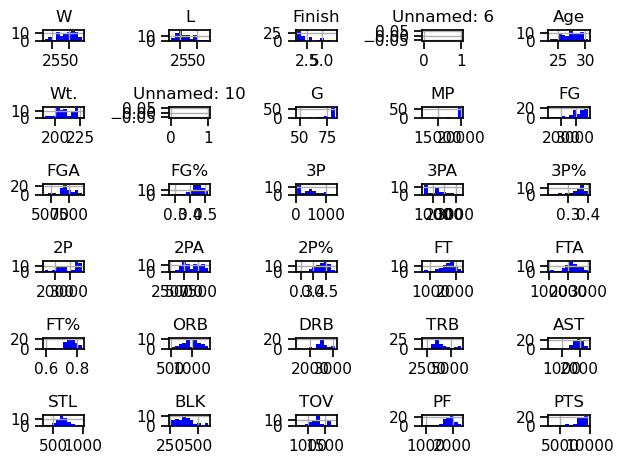

In [48]:
#Creating histogram layouts for all columns
df.hist(color='blue')
plt.tight_layout()

#### Reads the Celtics.csv dataset using the pd.read_csv() function, and selects only columns 0 and 4 using the usecols parameter. The index_col parameter is set to 0 to set the first column as the index. The head() function is then used to display the first 5 rows of the selected

In [49]:
# Reading data and showcasing the head
Celtics_Loss_data = pd.read_csv("Celtics.csv", usecols=[0,4], index_col=0)
Celtics_Loss_data.head()

,L
Season,
2023-24,12
2022-23,25
2021-22,31
2020-21,36
2019-20,24


#### The code creates a histogram of column L in dataframe df with orange bars using the hist function from matplotlib.pyplot, and adds axis labels and title using xlabel, ylabel, and title functions, and displays the plot using show function.

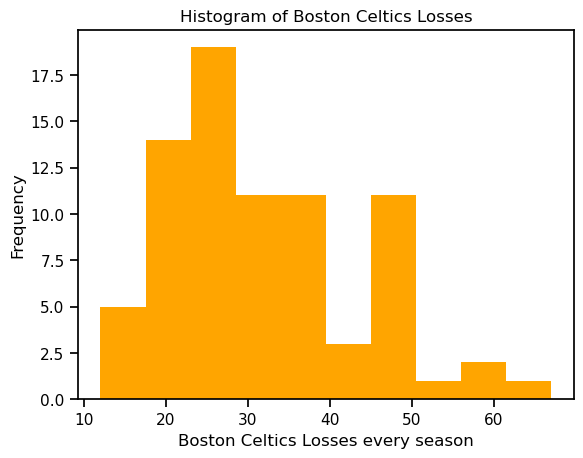

In [50]:
# Create a histogram
plt.hist(df.L, color='orange')

# Set labels and title
plt.xlabel('Boston Celtics Losses every season')
plt.ylabel('Frequency')
plt.title('Histogram of Boston Celtics Losses')

# Show the plot
plt.show()

#### This line of code calculates the mean of the Losses column in the Celtics_Loss_data dataframe and assigns it to the variable df_mean.



In [43]:
# Calculating mean of Losses column
df_mean = Celtics_Loss_data.mean()
df_mean

L    31.717949
dtype: float64

#### This will calculate the variance of the L column using the var() method and store the result in the df_var variable. You can then print the result using print(df_var).



In [7]:
#Calculating variance of Losses column
df_var = Celtics_Loss_data.var()
df_var

L    134.075258
dtype: float64

#### Computing alpha and beta (parameters of a gamma distribution)

In [44]:
# Computing alpha and beta (parameters of a gamma distribution)
alpha_mom = df_mean**2 / df_var
beta_mom = df_var / df_mean
alpha_mom,beta_mom

(L    7.50346
 dtype: float64,
 L    4.22711
 dtype: float64)

#### Calculating variables used to compute alpha and beta (paramaters of a gamma distribution) for the plot.
#### Note that log_mean and mean_log are parameters of the dlgamma function

In [45]:
# Calculating variables used to compute alpha and beta (paramaters of a gamma distribution) for the plot 
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [46]:
# Calculate log_mean and mean_log
log_mean = Celtics_Loss_data.mean().apply(np.log)
mean_log = Celtics_Loss_data.apply(np.log).mean()

log_mean,mean_log

(L    3.456883
 dtype: float64,
 L    3.392191
 dtype: float64)

#### This will output the MLE of the shape parameter (alpha) for the gamma distribution based on the given log-mean and mean-log. The exact output will depend on the values of log_mean[-1] and `mean_log[-1]

In [24]:
from scipy.optimize import newton

# Computing alpha 
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/544393620.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))


7.8918841218540114

#### Outputs the MLE of the scale parameter (beta) for the gamma distribution based on the MLE of the shape parameter (alpha) and the sample mean of the data. The exact output will depend on the values of alpha_mle and `Celtics_Loss_data.mean()

In [25]:
#Computing beta
beta_mle = alpha_mle/Celtics_Loss_data.mean()[-1]
beta_mle

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/2030077953.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_mle = alpha_mle/Celtics_Loss_data.mean()[-1]


0.2488144549331499

#### Celtics losses every season histogram
#### MLE and MOM plot fitted over the histogram

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/2905985862.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mom[0], scale = beta_mom[0]), color = 'blue', label = 'MOM')


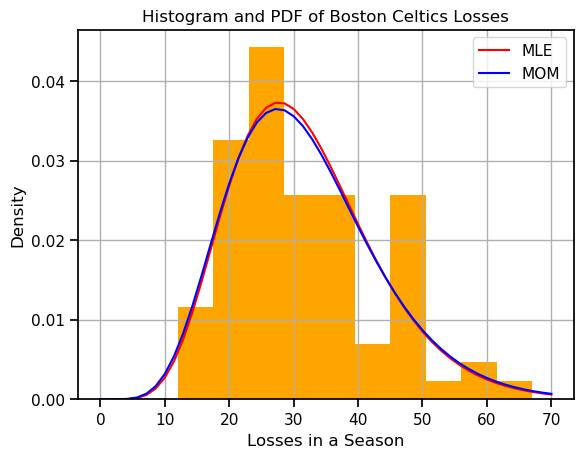

In [54]:
# Comparison of the MOM and MLE plots

# Plotting histogram
Celtics_Loss_data.hist(density=True, color='orange')

# MOM plot
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mle, scale = 1/beta_mle), color = 'red', label = 'MLE')

# MLE plot
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mom[0], scale = beta_mom[0]), color = 'blue', label = 'MOM')


plt.xlabel('Losses in a Season')
plt.ylabel('Density')
plt.title('Histogram and PDF of Boston Celtics Losses')



# Show the plot
plt.legend()
plt.show()

#### The PyMC model (Celtics_Loss_Model) has uniform priors for shape and scale (ualpha and ubeta) of gamma dist. with Model class from pymc and Uniform class from pymc, ualpha follows Unif(0,70) and ubeta follows Unif(0,70). The Model class returns a PyMC model object, and the Uniform class returns a stochastic variable that follows a uniform distribution.

In [51]:
from pymc import Model, Uniform, Gamma, fit

with Model() as Celtics_Loss_Model:
    ualpha = Uniform('ualpha', lower=0, upper=70)
    ubeta = Uniform('ubeta', lower=0, upper=70)

In [52]:
with Celtics_Loss_Model:
    loss_history = Gamma('loss_history', alpha=ualpha, beta=ubeta, observed=df_mean)

#### Sets random seed, fits PyMC model (Celtics_Loss_Model), samples 5000 MCMC draws, stores result in loss_trace.
#### loss_trace is a MultiTrace object with posterior samples for each stochastic variable in the model.

In [29]:
RANDOM_SEED = 20090425
from pymc import fit, Deterministic

with Celtics_Loss_Model: 
    loss_trace = fit(random_seed=RANDOM_SEED).sample(5000)

Finished [100%]: Average Loss = 33.925


#### Plots posterior distributions of shape and scale params (ualpha, ubeta) of gamma dist. from PyMC model (Celtics_Loss_Model), selects slice of loss_trace starting from 100th draw, specifies variables and color.


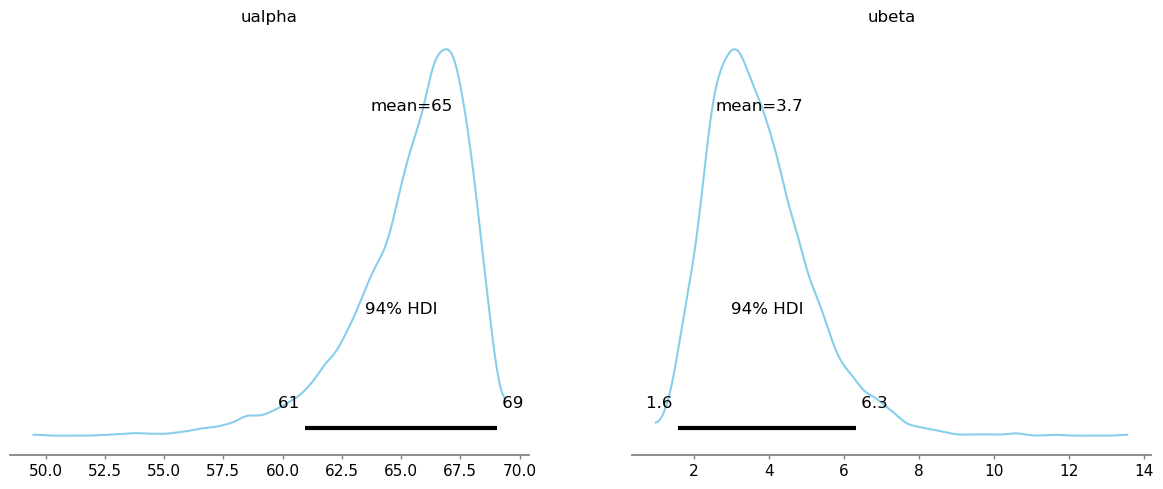

In [30]:
from pymc import plot_posterior

plot_posterior(loss_trace.sel(draw = slice(100,None)), 
                var_names=['ualpha', 'ubeta'],
                color='#87ceeb');

#### Note that loss_trace.posterior[['ualpha','ubeta']] returns a DataArray containing posterior samples of both ualpha and ubeta, and mean() method is called on the DataArray to compute the posterior mean.


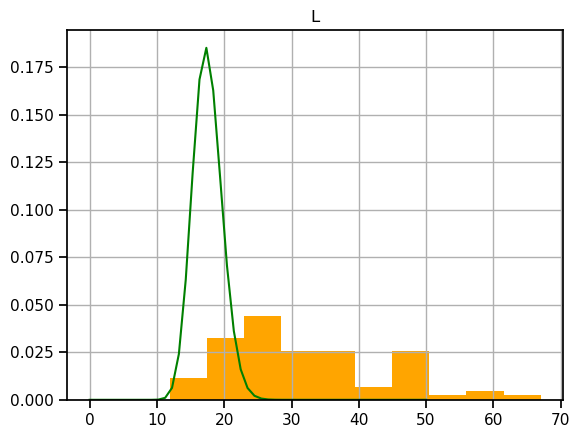

In [31]:
from scipy.stats.distributions import gamma

ualpha_posterior_mean = loss_trace.posterior['ualpha'].mean()
ubeta_posterior_mean = loss_trace.posterior['ubeta'].mean()

Celtics_Loss_data.hist(density=True, color='orange')


plt.plot(np.linspace(0, 50), gamma.pdf(np.linspace(0, 50), a = ualpha_posterior_mean, scale = 1/ubeta_posterior_mean), color = 'green', label = 'Bayesian')

#### This code snippet creates a PyMC Bayesian model named "Celtics_Expo_Loss" to simulate the distribution of losses using an Exponential distribution with a mean of 3, and then visualizes 10,000 samples drawn from this distribution.

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/2593208609.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(samples_e, kde=False);


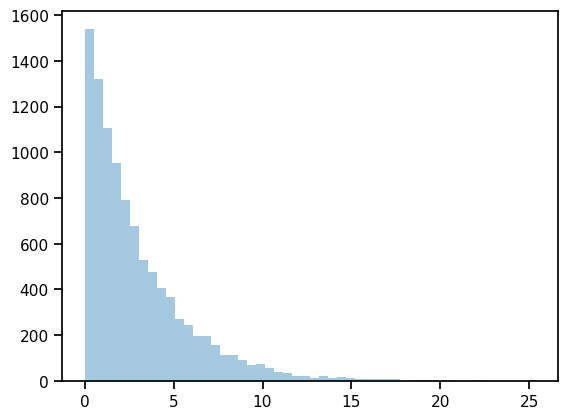

In [32]:
import pymc as pm
from pymc import Exponential

with pm.Model() as Celtics_Expo_Loss:
    e = pm.Exponential.dist(1/3)
    samples_e = pm.draw(e, draws=10000)
    
sns.distplot(samples_e, kde=False);

#### This code defines a PyMC Bayesian model named "Celtics_Model_exponential" where two variables, 'ealpha' and 'ebeta', are instantiated with Exponential distributions having rate parameters of 1/3, representing the expected value of the corresponding variables.

In [33]:
from pymc import Model, Exponential

with Model() as Celtics_Model_exponential:
    ealpha = Exponential('ealpha', 1/3.)
    ebeta = Exponential('ebeta', 1/3.)

#### This code integrates a Gamma distribution, "loss_like", into the Bayesian model "Celtics_Model_exponential" using parameters 'ealpha' and 'ebeta', and links it to observed data 'df_mean'.

In [34]:
from pymc import Gamma
with Celtics_Model_exponential:
    loss_like = Gamma('loss_like', alpha=ealpha, beta=ebeta, observed=df_mean)

#### This code fits the Bayesian model "Celtics_Model_exponential" using the fit function from PyMC, generating a trace of 5000 samples.

In [35]:
from pymc import fit

with Celtics_Model_exponential: 
    Celtics_trace_exponential = fit(random_seed=RANDOM_SEED).sample(5000)

Finished [100%]: Average Loss = 9.6578


#### This code plots the posterior distributions of variables 'ealpha' and 'ebeta' from the Bayesian trace "Celtics_trace_exponential", excluding the first 100 samples. 






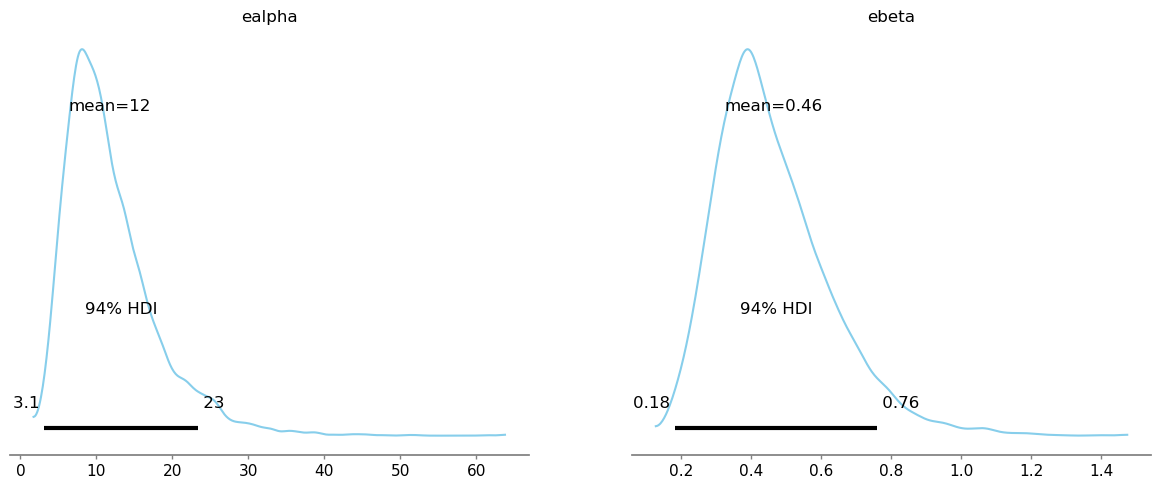

In [36]:
from pymc import plot_posterior

plot_posterior(Celtics_trace_exponential.sel(draw = slice(100,None)), 
                var_names=['ealpha', 'ebeta'],
                color='#87ceeb');

#### This code calculates the posterior means of variables 'ealpha' and 'ebeta' from the Bayesian trace "Celtics_trace_exponential" and then plots a histogram of 'Celtics_Loss_data' in orange. It overlays a gamma probability density function (PDF) with parameters based on the posterior means of 'ealpha' and 'ebeta'.

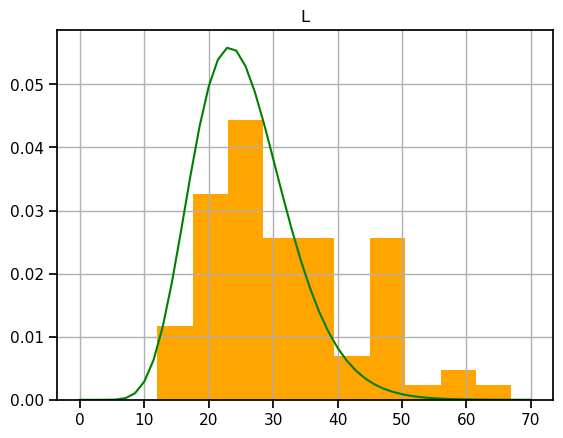

In [37]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = Celtics_trace_exponential.posterior['ealpha'].mean()
ebeta_posterior_mean = Celtics_trace_exponential.posterior['ebeta'].mean()

Celtics_Loss_data.hist(density=True, color='orange')


plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = ealpha_posterior_mean, scale = 1/ebeta_posterior_mean), color = 'green', label = 'Bayesian')

In [38]:
Celtics_trace_exponential.posterior['ealpha'].mean()

<xarray.DataArray 'ealpha' ()> Size: 8B
array(11.80283009)

#### This code extends the previous plot by overlaying two additional gamma probability density functions (PDFs): one based on Maximum Likelihood Estimation (MLE) in red, and another based on the Method of Moments (MOM) in blue. The legend is included for clarity, and the plot is displayed.

/var/folders/zw/vqcb9myx13lcyv937_rvmx2r0000gn/T/ipykernel_71921/2769368428.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mom[0], scale = beta_mom[0]), color = 'blue', label = 'MOM')


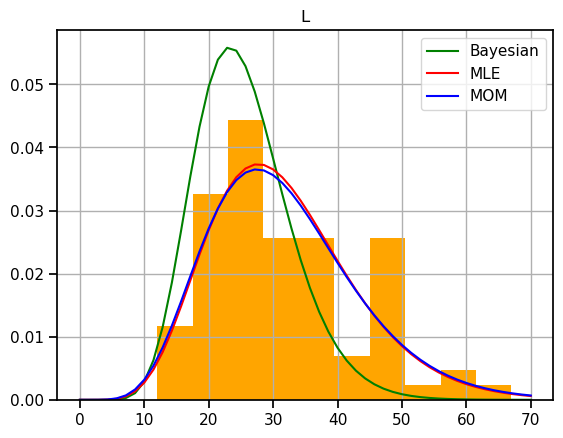

In [53]:
from scipy.stats.distributions import gamma

ealpha_posterior_mean = Celtics_trace_exponential.posterior['ealpha'].mean()
ebeta_posterior_mean = Celtics_trace_exponential.posterior['ebeta'].mean()

Celtics_Loss_data.hist(density=True, color='orange')


plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = ealpha_posterior_mean, scale = 1/ebeta_posterior_mean), color = 'green', label = 'Bayesian')

# MOM plot
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mle, scale = 1/beta_mle), color = 'red', label = 'MLE')

# MLE plot
plt.plot(np.linspace(0, 70), gamma.pdf(np.linspace(0, 70), a = alpha_mom[0], scale = beta_mom[0]), color = 'blue', label = 'MOM')

plt.legend()
plt.show()

#### In summary, MLE tends to outperform MOM and Bayesian estimation in this context because it directly optimizes the likelihood of the observed data, resulting in parameter estimates that closely match the data distribution. However, the choice of estimation method depends on the specific context, available data, and underlying assumptions of the model.